In [1]:
from keras.models import load_model
from keras.utils import to_categorical

In [2]:
import numpy as np
import json
import pathlib
import random
import matplotlib.pyplot as plt
import cv2

In [3]:
subset_paths = {
  'train': pathlib.Path('./dataset/train'),
  'val': pathlib.Path('./dataset/val'),
  'test': pathlib.Path('./dataset/test'),
}

HEIGHT = 224
WIDTH = 224
N_FRAMES = 20
num_classes = 64

In [4]:
import math

def groupFrames(video_path, n_frames = N_FRAMES, frame_step = 15):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  encoded_string = video_path.encode('latin-1')
  video_path = encoded_string.decode("utf-8")
  src = cv2.VideoCapture(video_path)  
  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)   
  if video_length < 80:
        frame_step = int(math.floor(frame_step/2))
  print(f'Video url: {video_path}, video_length:{video_length}')
  need_length = 1 + (n_frames - 1) * frame_step
  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)
  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  if ret: 
      frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      frame = np.expand_dims(frame, axis=-1) 
      result.append(frame/255)
  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:   
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame = np.expand_dims(frame, axis=-1) 
        result.append(frame/255)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  cv2.destroyAllWindows()
  result = np.array(result)
  #print('SHAPE RESULT',result.shape)
  return result

In [5]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''
    encoded_string = video_path.encode('latin-1')
    video_path = encoded_string.decode("utf-8")
    
    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f'Video url: {video_path}, video_length:{video_frames_count}')
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/N_FRAMES), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(N_FRAMES):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break
            
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame = np.expand_dims(frame, axis=-1) 

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (WIDTH, HEIGHT))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_list

In [6]:
def find_id(labels,name):
   return list(filter(lambda x: x['name'] == name,labels))[0]

def get_files_and_class_names(path):
    video_paths = list(path.glob('*/*.avi'))
    classes = [p.parent.name for p in video_paths]
    f = open('./dataset.json')
    labels = json.load(f)
    classes = np.array(list(map(lambda x: int(find_id(labels,x)['id'])-1,classes)))
    encoded_labels = to_categorical(classes)
    #modificar entre groupFrames y frames_extraction
    videos = np.array([groupFrames(str(p)) for p in video_paths],dtype='float16')
    return videos, classes

# Preparando datos de prueba

In [7]:
x_test, y_test = get_files_and_class_names(subset_paths['test'])

Video url: dataset\test\Aceptar\050_001_002.avi, video_length:182.0
Video url: dataset\test\Aceptar\050_002_005.avi, video_length:152.0
Video url: dataset\test\Aceptar\050_003_004.avi, video_length:152.0
Video url: dataset\test\Aceptar\050_005_002.avi, video_length:152.0
Video url: dataset\test\Aceptar\050_006_002.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_006_005.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_007_003.avi, video_length:92.0
Video url: dataset\test\Aceptar\050_008_001.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_008_004.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_009_002.avi, video_length:152.0
Video url: dataset\test\Agua\022_001_004.avi, video_length:118.0
Video url: dataset\test\Agua\022_002_005.avi, video_length:118.0
Video url: dataset\test\Agua\022_003_002.avi, video_length:148.0
Video url: dataset\test\Agua\022_005_001.avi, video_length:118.0
Video url: dataset\test\Agua\022_005_005.avi, video_length:11

Video url: dataset\test\Ayuda\056_006_001.avi, video_length:122.0
Video url: dataset\test\Ayuda\056_007_001.avi, video_length:92.0
Video url: dataset\test\Ayuda\056_007_003.avi, video_length:122.0
Video url: dataset\test\Ayuda\056_008_003.avi, video_length:92.0
Video url: dataset\test\Ayuda\056_009_001.avi, video_length:122.0
Video url: dataset\test\Azul claro\006_002_003.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_002_004.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_003_004.avi, video_length:88.0
Video url: dataset\test\Azul claro\006_004_004.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_006_001.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_006_004.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_007_005.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_008_001.avi, video_length:208.0
Video url: dataset\test\Azul claro\006_008_004.avi, video_length:178.0
Video url: dataset\test\Azul claro

Video url: dataset\test\Correr\061_002_004.avi, video_length:122.0
Video url: dataset\test\Correr\061_003_004.avi, video_length:152.0
Video url: dataset\test\Correr\061_004_004.avi, video_length:122.0
Video url: dataset\test\Correr\061_006_004.avi, video_length:152.0
Video url: dataset\test\Correr\061_007_005.avi, video_length:122.0
Video url: dataset\test\Correr\061_008_002.avi, video_length:122.0
Video url: dataset\test\Correr\061_008_005.avi, video_length:122.0
Video url: dataset\test\Correr\061_009_005.avi, video_length:122.0
Video url: dataset\test\Correr\061_010_001.avi, video_length:122.0
Video url: dataset\test\Correr\061_010_004.avi, video_length:152.0
Video url: dataset\test\Cumpleaños\030_001_003.avi, video_length:152.0
Video url: dataset\test\Cumpleaños\030_002_005.avi, video_length:122.0
Video url: dataset\test\Cumpleaños\030_003_005.avi, video_length:122.0
Video url: dataset\test\Cumpleaños\030_007_002.avi, video_length:152.0
Video url: dataset\test\Cumpleaños\030_007_005

Video url: dataset\test\Hambriento\033_002_005.avi, video_length:152.0
Video url: dataset\test\Hambriento\033_003_005.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_004_004.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_004_005.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_005_005.avi, video_length:152.0
Video url: dataset\test\Hambriento\033_007_004.avi, video_length:152.0
Video url: dataset\test\Hambriento\033_009_004.avi, video_length:122.0
Video url: dataset\test\Hijo\011_001_001.avi, video_length:118.0
Video url: dataset\test\Hijo\011_003_005.avi, video_length:118.0
Video url: dataset\test\Hijo\011_004_004.avi, video_length:118.0
Video url: dataset\test\Hijo\011_006_001.avi, video_length:118.0
Video url: dataset\test\Hijo\011_007_003.avi, video_length:118.0
Video url: dataset\test\Hijo\011_008_004.avi, video_length:88.0
Video url: dataset\test\Hijo\011_009_002.avi, video_length:88.0
Video url: dataset\test\Hijo\011_009_005.avi, vide

Video url: dataset\test\Ninguno\038_005_005.avi, video_length:152.0
Video url: dataset\test\Ninguno\038_007_003.avi, video_length:152.0
Video url: dataset\test\Ninguno\038_009_005.avi, video_length:152.0
Video url: dataset\test\Nombre\039_001_002.avi, video_length:122.0
Video url: dataset\test\Nombre\039_001_004.avi, video_length:92.0
Video url: dataset\test\Nombre\039_002_003.avi, video_length:122.0
Video url: dataset\test\Nombre\039_003_001.avi, video_length:152.0
Video url: dataset\test\Nombre\039_003_002.avi, video_length:122.0
Video url: dataset\test\Nombre\039_004_001.avi, video_length:122.0
Video url: dataset\test\Nombre\039_005_003.avi, video_length:122.0
Video url: dataset\test\Nombre\039_005_004.avi, video_length:122.0
Video url: dataset\test\Nombre\039_009_004.avi, video_length:122.0
Video url: dataset\test\Nombre\039_010_001.avi, video_length:122.0
Video url: dataset\test\Opaco\001_001_003.avi, video_length:118.0
Video url: dataset\test\Opaco\001_001_004.avi, video_length:1

Video url: dataset\test\Verde\003_004_002.avi, video_length:148.0
Video url: dataset\test\Verde\003_005_005.avi, video_length:118.0
Video url: dataset\test\Verde\003_007_003.avi, video_length:88.0
Video url: dataset\test\Verde\003_009_002.avi, video_length:118.0
Video url: dataset\test\Verde\003_010_001.avi, video_length:118.0
Video url: dataset\test\Verde\003_010_003.avi, video_length:88.0
Video url: dataset\test\Verde\003_010_004.avi, video_length:118.0
Video url: dataset\test\Yogur\049_001_001.avi, video_length:152.0
Video url: dataset\test\Yogur\049_001_004.avi, video_length:152.0
Video url: dataset\test\Yogur\049_004_003.avi, video_length:122.0
Video url: dataset\test\Yogur\049_004_004.avi, video_length:122.0
Video url: dataset\test\Yogur\049_006_002.avi, video_length:152.0
Video url: dataset\test\Yogur\049_006_005.avi, video_length:152.0
Video url: dataset\test\Yogur\049_007_005.avi, video_length:122.0
Video url: dataset\test\Yogur\049_009_003.avi, video_length:152.0
Video url: d

In [8]:
x_test.shape

(640, 20, 224, 224, 1)

## Modelo ConvLSTM

In [116]:
model = load_model('./models/modelConvLSTM')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 222, 222, 4)   736       
                                                                 
 max_pooling3d (MaxPooling3  (None, 20, 111, 111, 4)   0         
 D)                                                              
                                                                 
 time_distributed (TimeDist  (None, 20, 111, 111, 4)   0         
 ributed)                                                        
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 109, 109, 8)   3488      
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 20, 55, 55, 8)     0         
 g3D)                                                            
                                                        

In [11]:
model_evaluation_history = model.evaluate(x_test,y_test)

 9/20 [============>.................] - ETA: 1:37 - loss: 0.1493 - accuracy: 0.9688

KeyboardInterrupt: 

In [46]:
print(model_evaluation_history)

[0.11235324293375015, 0.9750000238418579]


## Confusion matrix

In [195]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [65]:
#Predict
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis = 1)

20/20 [==============================] - 176s 9s/step


<Axes: >

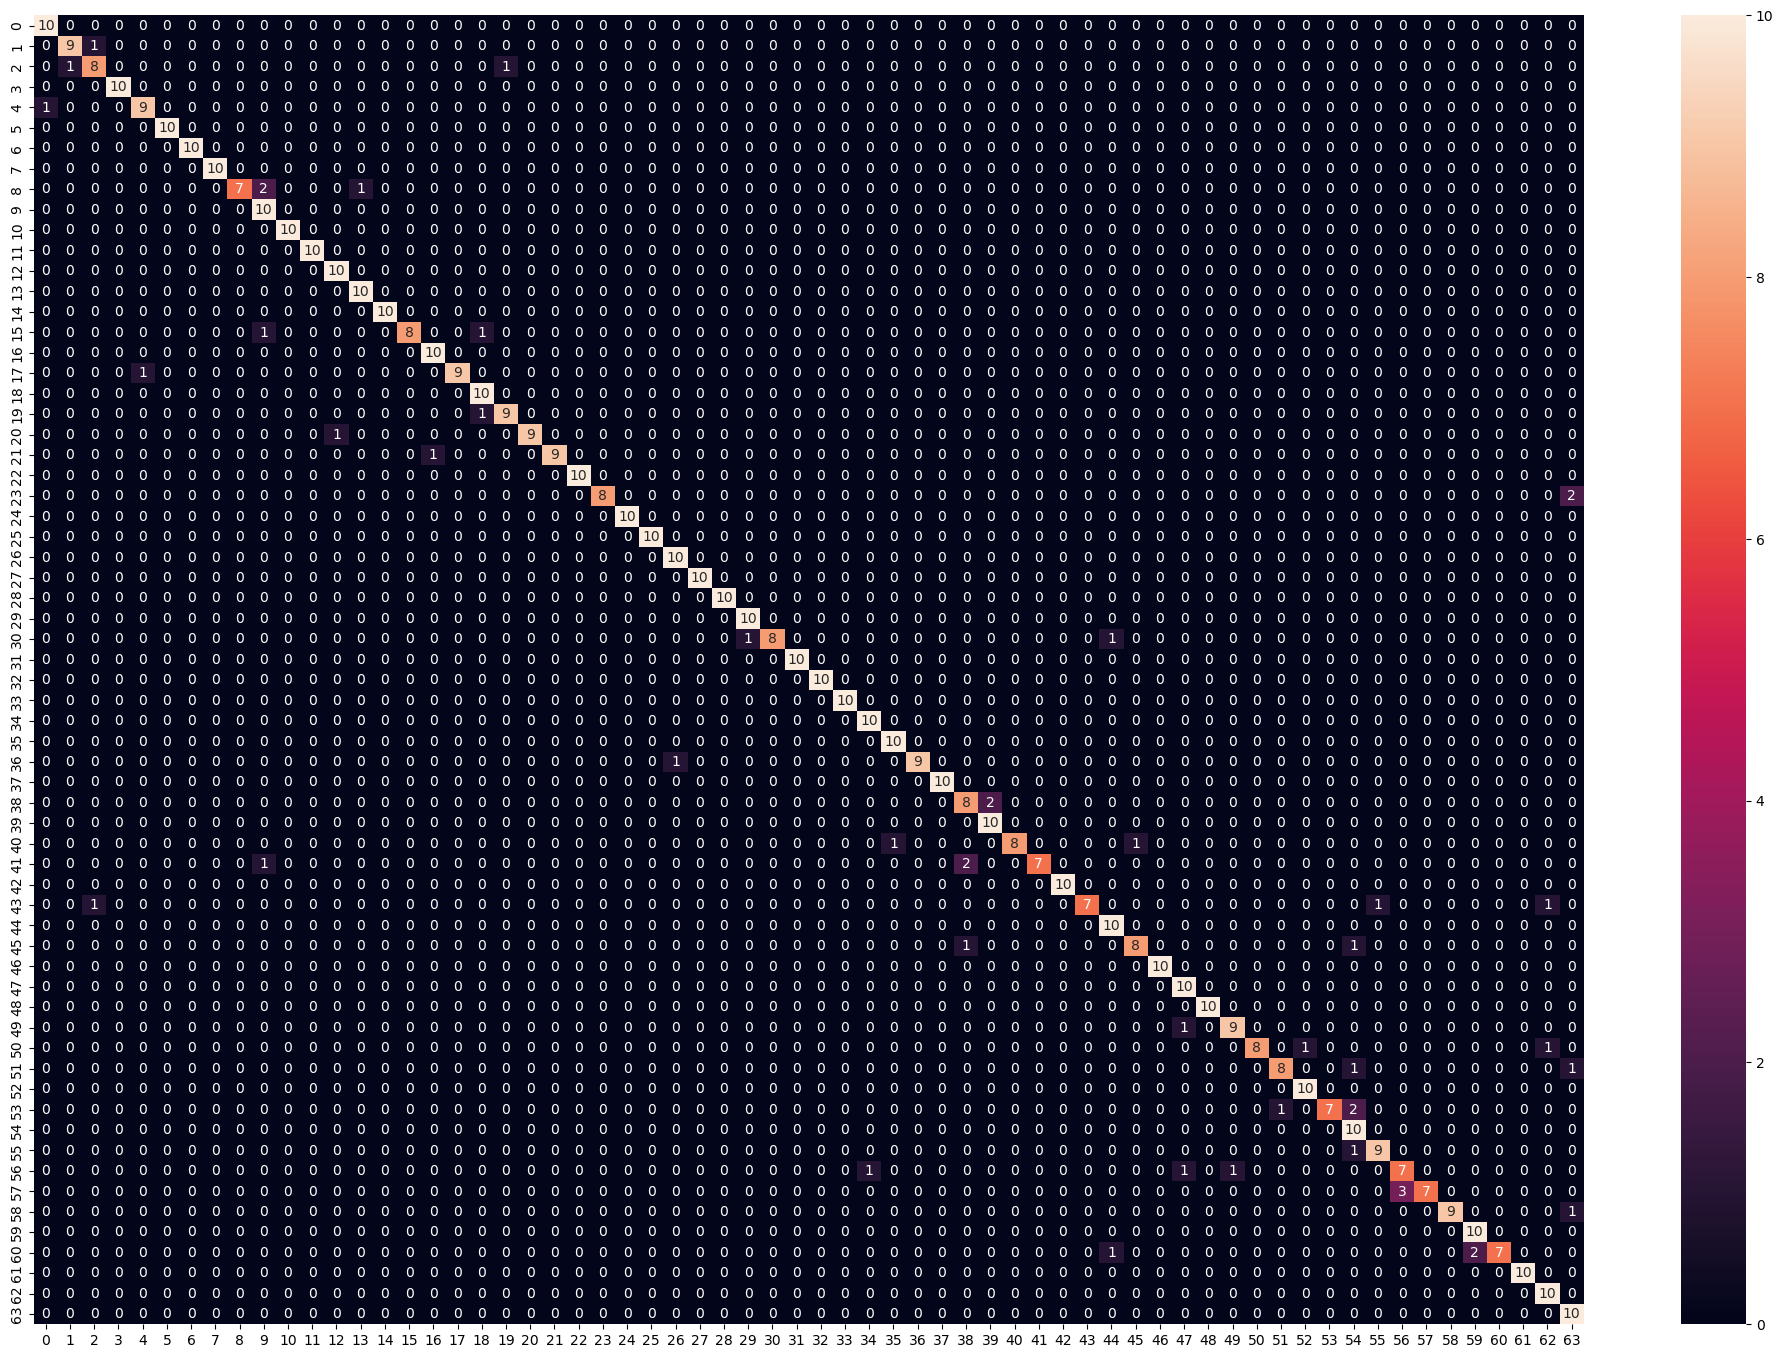

In [201]:
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction )
df_matrix = pd.DataFrame(result)
plt.figure(figsize = (25,17))
sn.heatmap(df_matrix,annot=True)

In [67]:
result.shape

(64, 64)

## Experiments with other data

In [96]:
name_vid = 'prueba1.avi'

In [97]:
vid_unprocessed = f'./pruebas/{name_vid}'
frames = frames_extraction(vid_unprocessed)

Video url: ./pruebas/prueba1.avi, video_length:62


In [98]:
def resizeVid(video,width = WIDTH, height = HEIGHT):
    resizedVideo = []
    size = len(video)
    for img in video:
        img = cv2.flip(img,1)
        img = cv2.resize(img,(width,height))
        img = np.expand_dims(img, axis=-1) 
        resizedVideo.append(img)
    return resizedVideo

In [99]:
frames = np.array([resizeVid(frames)])
frames.shape

(1, 20, 224, 224, 1)

In [100]:
frames[0].shape

(20, 224, 224, 1)

In [101]:
showFrames = frames[0].reshape(5,4,224,224,1)

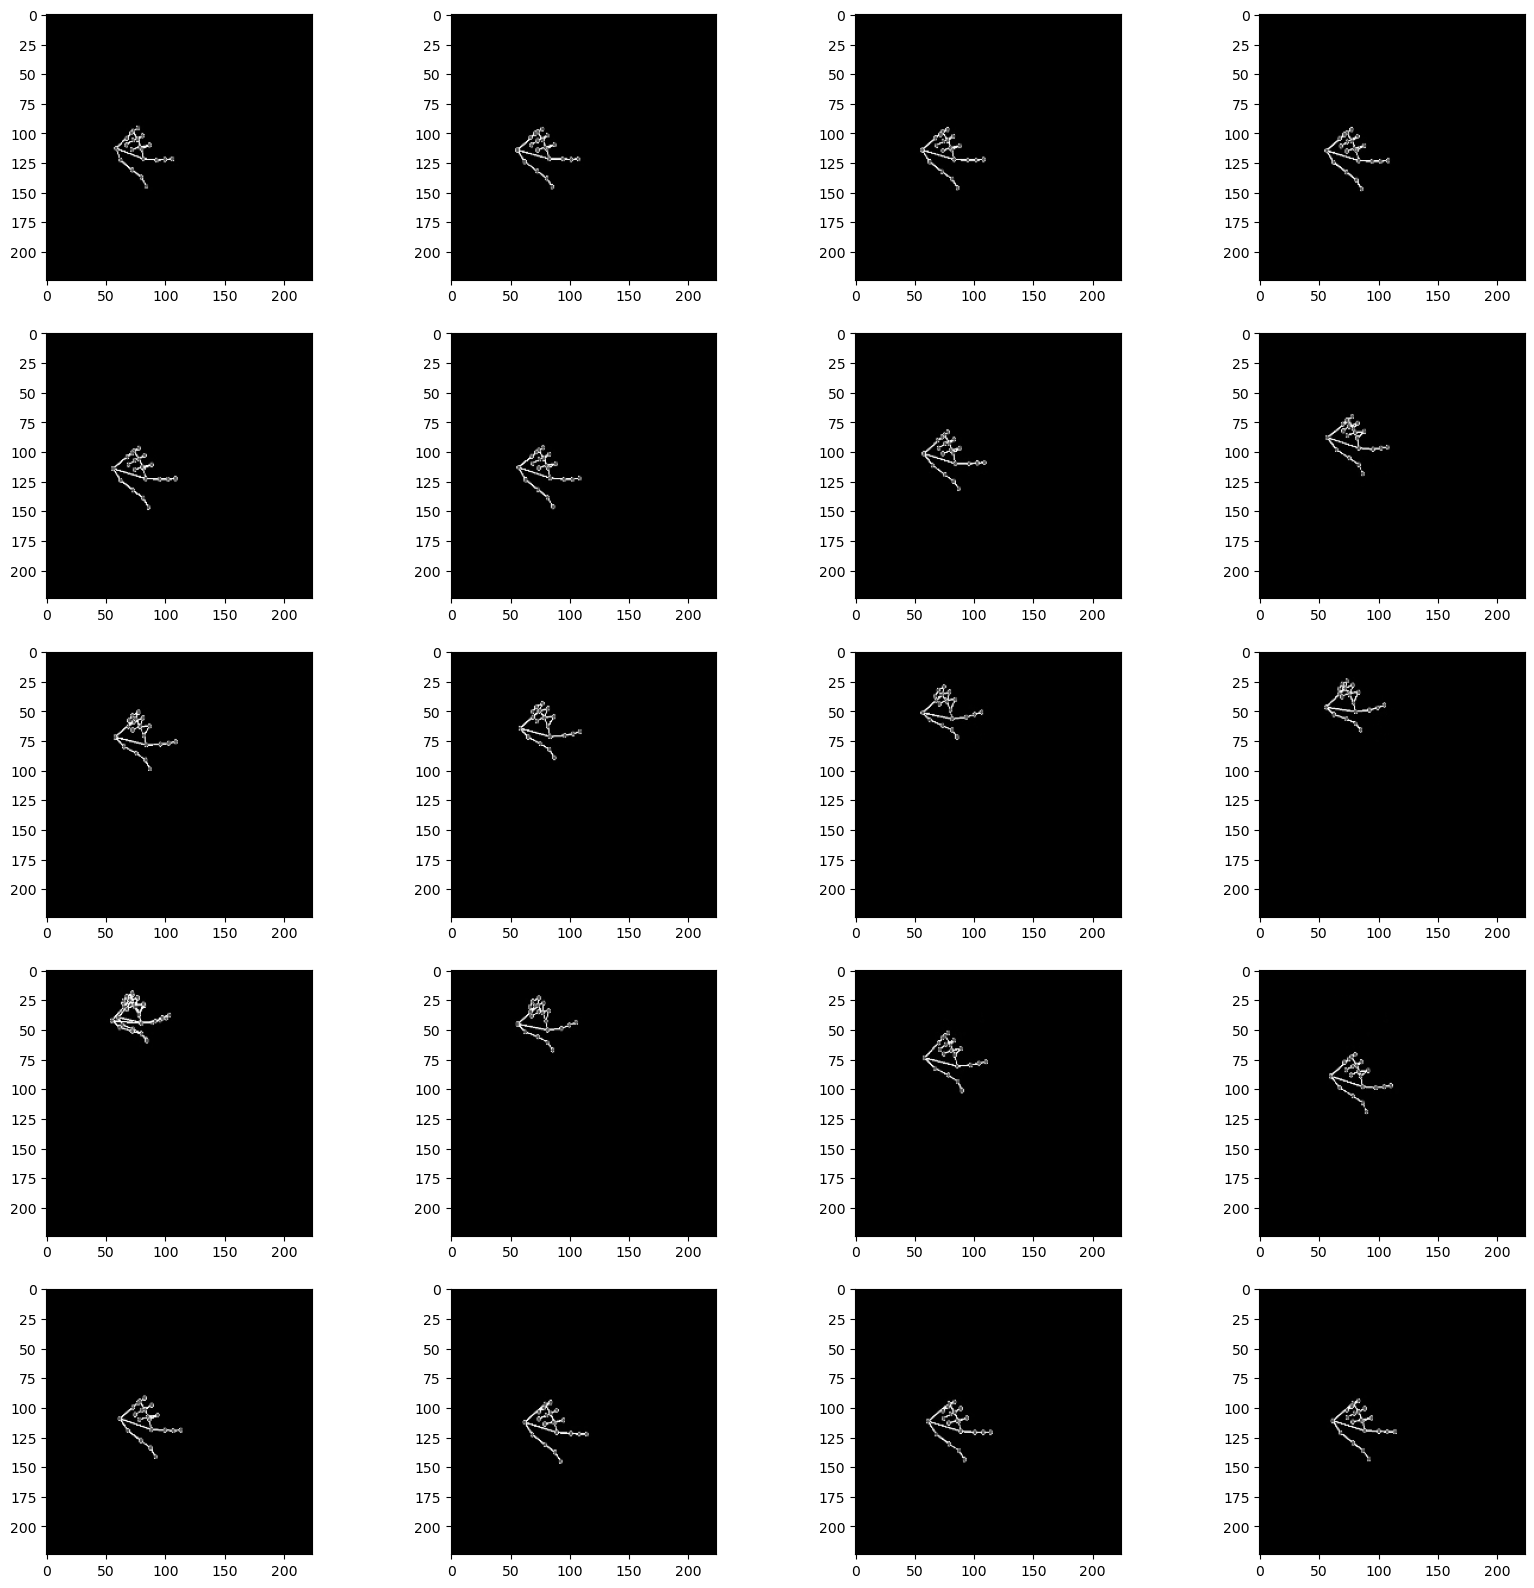

In [102]:
f,ax = plt.subplots(5,4, figsize= (20,20))
for i in range(5):
    for j in range(4):
        ax[i,j].imshow(showFrames[i][j], cmap='gray')

In [62]:
f.savefig("figure.png")

In [103]:
prediction = np.argmax(model.predict(frames))+1
prediction

1/1 [==============================] - 0s 289ms/step


53

In [38]:
model.predict(frames)[0][prediction-1]

1/1 [==============================] - 0s 269ms/step


0.9986393

# Modelo LRCN

In [49]:
modelLRCN = load_model('./models/lrcnModel')

In [55]:
model_ev_LRCN = modelLRCN.evaluate(x_test,y_test)

20/20 [==============================] - 22s 1s/step - loss: 0.2183 - accuracy: 0.9406


In [88]:
prediction = np.argmax(modelLRCN.predict(frames))+1
prediction

1/1 [==============================] - 0s 74ms/step


21

In [89]:
modelLRCN.predict(frames)[0][prediction-1]

1/1 [==============================] - 0s 47ms/step


0.5142267

In [107]:
glovelessTestPath = pathlib.Path('./pruebas/landmarksVids')
glovelessVids = list(glovelessTestPath.glob('*.avi'))
glovelessVids

[WindowsPath('pruebas/landmarksVids/sign01.avi'),
 WindowsPath('pruebas/landmarksVids/sign02.avi'),
 WindowsPath('pruebas/landmarksVids/sign03.avi'),
 WindowsPath('pruebas/landmarksVids/sign04.avi'),
 WindowsPath('pruebas/landmarksVids/sign05.avi'),
 WindowsPath('pruebas/landmarksVids/sign06.avi'),
 WindowsPath('pruebas/landmarksVids/sign07.avi'),
 WindowsPath('pruebas/landmarksVids/sign08.avi'),
 WindowsPath('pruebas/landmarksVids/sign09.avi'),
 WindowsPath('pruebas/landmarksVids/sign10.avi'),
 WindowsPath('pruebas/landmarksVids/sign11.avi'),
 WindowsPath('pruebas/landmarksVids/sign12.avi'),
 WindowsPath('pruebas/landmarksVids/sign13.avi'),
 WindowsPath('pruebas/landmarksVids/sign14.avi'),
 WindowsPath('pruebas/landmarksVids/sign15.avi'),
 WindowsPath('pruebas/landmarksVids/sign16.avi'),
 WindowsPath('pruebas/landmarksVids/sign17.avi'),
 WindowsPath('pruebas/landmarksVids/sign18.avi'),
 WindowsPath('pruebas/landmarksVids/sign19.avi'),
 WindowsPath('pruebas/landmarksVids/sign20.avi'),


In [21]:
gloveTestPath = pathlib.Path('./pruebas/serie_prueba_guantes')
gloveVids = list(gloveTestPath.glob('*.mp4'))
gloveVids

[WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_210604.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_210636.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_210702.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_210754.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_210824.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_210918.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_210943.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_211005.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_211122.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_211146.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_211206.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_211233.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_211254.mp4'),
 WindowsPath('pruebas/serie_prueba_guantes/VID_20231115_211320.mp4'),
 WindowsPath('prueba

In [110]:
labelsPruebas = np.array(list(range(64)),dtype='int16')

In [111]:
labelsPruebas

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int16)

In [112]:
x_bare = np.array([resizeVid(frames_extraction(str(p))) for p in glovelessVids],dtype='float16') 

Video url: pruebas\landmarksVids\sign01.avi, video_length:46
Video url: pruebas\landmarksVids\sign02.avi, video_length:54
Video url: pruebas\landmarksVids\sign03.avi, video_length:60
Video url: pruebas\landmarksVids\sign04.avi, video_length:42
Video url: pruebas\landmarksVids\sign05.avi, video_length:52
Video url: pruebas\landmarksVids\sign06.avi, video_length:47
Video url: pruebas\landmarksVids\sign07.avi, video_length:39
Video url: pruebas\landmarksVids\sign08.avi, video_length:58
Video url: pruebas\landmarksVids\sign09.avi, video_length:59
Video url: pruebas\landmarksVids\sign10.avi, video_length:43
Video url: pruebas\landmarksVids\sign11.avi, video_length:42
Video url: pruebas\landmarksVids\sign12.avi, video_length:56
Video url: pruebas\landmarksVids\sign13.avi, video_length:48
Video url: pruebas\landmarksVids\sign14.avi, video_length:50
Video url: pruebas\landmarksVids\sign15.avi, video_length:33
Video url: pruebas\landmarksVids\sign16.avi, video_length:61
Video url: pruebas\landm

In [113]:
x_bare.shape

(64, 20, 224, 224, 1)

In [117]:
model.evaluate(x_bare,labelsPruebas)

2/2 [==============================] - 19s 9s/step - loss: 4.8189 - accuracy: 0.4844


[4.81892204284668, 0.484375]

In [115]:
predictionsBare = np.array([np.argmax(c) for c in model.predict(x_bare)])

2/2 [==============================] - 19s 10s/step


In [20]:
predictionsBare

array([20,  1, 24,  3,  4,  5,  6, 28,  8,  9, 10, 11, 15, 25, 14, 20, 26,
       17, 20, 19, 58, 61, 61, 32,  9, 25, 26,  3, 63, 45, 49, 30, 32, 35,
       52, 35, 26,  5, 41, 39, 40,  1, 42, 43, 62, 45, 46, 56, 48, 49, 50,
       20, 57, 53, 54, 32, 56, 57, 38, 59, 60, 39, 50, 63], dtype=int64)

In [23]:
ok_bare = labelsPruebas[predictionsBare == labelsPruebas]

In [25]:
ok_bare

array([ 1,  3,  4,  5,  6,  8,  9, 10, 11, 14, 17, 19, 25, 26, 32, 35, 39,
       40, 42, 43, 45, 46, 48, 49, 50, 53, 54, 56, 57, 59, 60, 63],
      dtype=int16)

In [149]:
x_gloves = np.array([resizeVid(frames_extraction(str(p))) for p in gloveVids],dtype='float16') 

Video url: pruebas\processedVidsGloves\VID_20231115_210604.avi, video_length:41
Video url: pruebas\processedVidsGloves\VID_20231115_210636.avi, video_length:64
Video url: pruebas\processedVidsGloves\VID_20231115_210702.avi, video_length:63
Video url: pruebas\processedVidsGloves\VID_20231115_210754.avi, video_length:47
Video url: pruebas\processedVidsGloves\VID_20231115_210824.avi, video_length:52
Video url: pruebas\processedVidsGloves\VID_20231115_210918.avi, video_length:65
Video url: pruebas\processedVidsGloves\VID_20231115_210943.avi, video_length:49
Video url: pruebas\processedVidsGloves\VID_20231115_211005.avi, video_length:49
Video url: pruebas\processedVidsGloves\VID_20231115_211122.avi, video_length:62
Video url: pruebas\processedVidsGloves\VID_20231115_211146.avi, video_length:52
Video url: pruebas\processedVidsGloves\VID_20231115_211206.avi, video_length:46
Video url: pruebas\processedVidsGloves\VID_20231115_211233.avi, video_length:78
Video url: pruebas\processedVidsGloves\V

In [150]:
x_gloves.shape

(64, 20, 224, 224, 1)

In [151]:
model.evaluate(x_gloves,labelsPruebas)

2/2 [==============================] - 17s 9s/step - loss: 12.3484 - accuracy: 0.0312


[12.348395347595215, 0.03125]

In [93]:
modelLRCN.evaluate(x_bare,labelsPruebas)

2/2 [==============================] - 2s 874ms/step - loss: 5.9744 - accuracy: 0.1719


[5.9744439125061035, 0.171875]

In [44]:
modelLRCN.evaluate(x_gloves,labelsPruebas)

2/2 [==============================] - 3s 1s/step - loss: 9.6835 - accuracy: 0.0312


[9.683499336242676, 0.03125]